<a href="https://colab.research.google.com/github/Stephaaniee/ProjectWork/blob/main/Tst2_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *
from fastai.data.core import DataLoader
import random
import re
import os
import shutil
import PIL
import torch
import numpy as np
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files
from fastai.data.core import DataLoaders
from fastbook import *
import pathlib
import tensorflow as tf

In [1]:
pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.wh

In [3]:
set_seed(42)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  #split data
# import splitfolders
# splitfolders.ratio(r'C:\Users\okosa.s\Documents\Project Work\FirstTest\sugar_beets', output="output", seed=1337, ratio=(.8, 0.1,0.1))

In [5]:
#ensuring the images are the same size , label and augument the data
item_tfms = RandomResizedCrop(460, min_scale = 0.75, ratio=(1., 1.)),
batch_tfms = [*aug_transforms(size = 224, max_warp=0), Normalize.from_stats(*imagenet_stats)] #scaling the image to train faster
bs=64

In [6]:
dataTest = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed= 42),
    # get_y = using_attr(RegexLabeller(pat = r'([\w]+).\d+..*$'), 'name'),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(460, min_scale = 0.75, ratio=(1., 1.)),
    batch_tfms = [*aug_transforms(size = 224, max_warp=0), Normalize.from_stats(*imagenet_stats)] #scaling the image to train faster
)

In [7]:
dls = dataTest.dataloaders('/content/drive/MyDrive/output/test', bs=32)

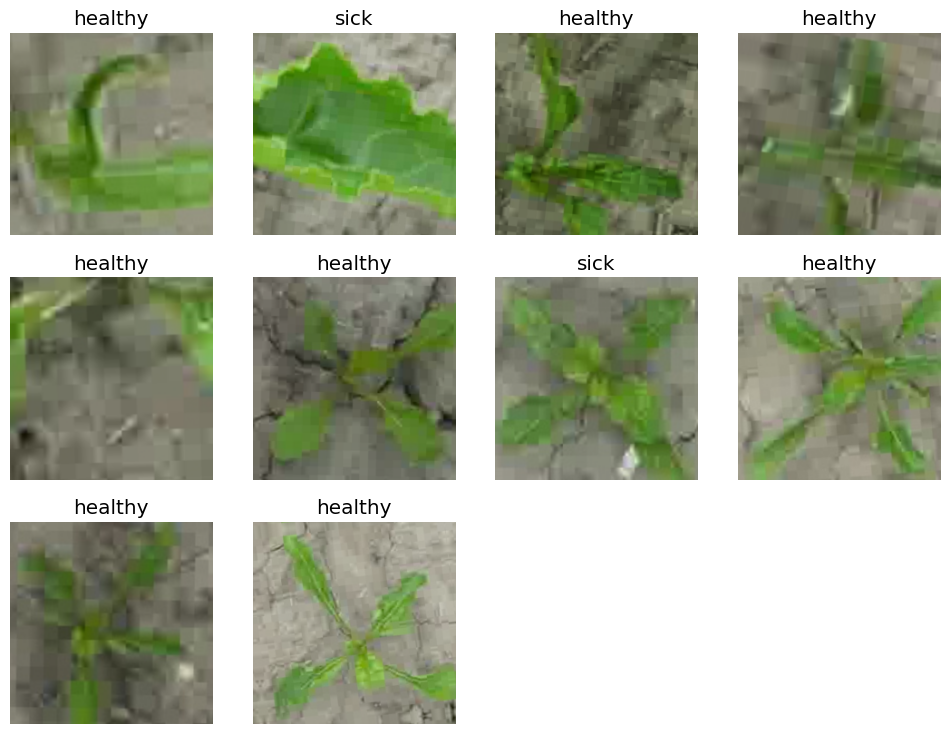

In [14]:
dls.show_batch(max_n=10)

In [16]:
model = vision_learner(dls, resnet34, metrics = error_rate)
#resnet34 formulate pixels from pictures
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.163598,0.799986,0.405797,11:32
1,0.921308,0.512522,0.194203,00:15
2,0.728381,0.491227,0.168116,00:16
3,0.587443,0.467621,0.171014,00:16
4,0.518043,0.472743,0.162319,00:15


In [26]:
# from fastai.callback import *
# early_stop = EarlyStoppingCallback(model, patience=20)
# save_best_model = SaveModelCallback(model, name='save_best_model')

In [28]:
learn = vision_learner(dls, resnet34, metrics=accuracy).to_fp16()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.300187,0.789763,0.579710,00:15
1,0.971611,0.577219,0.733333,00:15
2,0.773313,0.480209,0.808696,00:15
3,0.681733,0.483613,0.805797,00:18
4,0.619872,0.480095,0.817391,00:16


In [29]:
model.unfreeze #(so we backpropagate through the entire model not only the last layer)


<bound method Learner.unfreeze of <fastai.learner.Learner object at 0x78352a6fe2f0>>

In [52]:
def find_appropraite_lr(model:Learner, lr_diff:int = 15, loss_threshold:float = .05, adjust_value:float = 1, plot:bool = False)-> float:
  model.lr_find()
  losses = np.array(model.recorder.losses)
  min_losses_index = np.argmin(losses)

  lrs = model.recorder.lrs
  return lrs[min_losses_index]/10


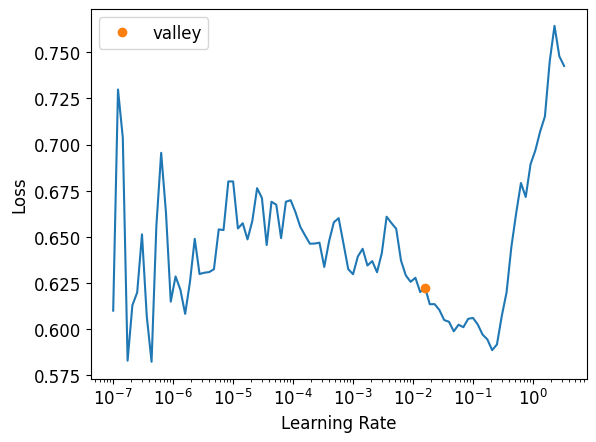

In [53]:
optimal_lr = find_appropraite_lr(model)

In [56]:
model.fit_one_cycle(20, lr_max = slice(optimal_lr/10, optimal_lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.714727,0.924258,0.156522,00:17
1,0.668508,0.968086,0.156522,00:16
2,0.687921,0.918036,0.156522,00:15
3,0.668715,0.936673,0.159420,00:15
4,0.668341,0.988674,0.159420,00:15
5,0.704117,0.957241,0.156522,00:16
6,0.677562,0.963051,0.159420,00:17
7,0.673149,0.937270,0.159420,00:16
8,0.685654,0.950931,0.159420,00:15
9,0.687418,0.933843,0.156522,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.299025,0.404674,0.156522,00:15
1,0.312649,0.394446,0.168116,00:15
2,0.310524,0.401781,0.144928,00:15
3,0.290704,0.398950,0.156522,00:16
4,0.267357,0.395304,0.147826,00:16
5,0.257994,0.398863,0.153623,00:16
6,0.249475,0.403471,0.153623,00:16
7,0.239608,0.393673,0.153623,00:15
8,0.236409,0.396317,0.150725,00:17
9,0.226091,0.393425,0.156522,00:15


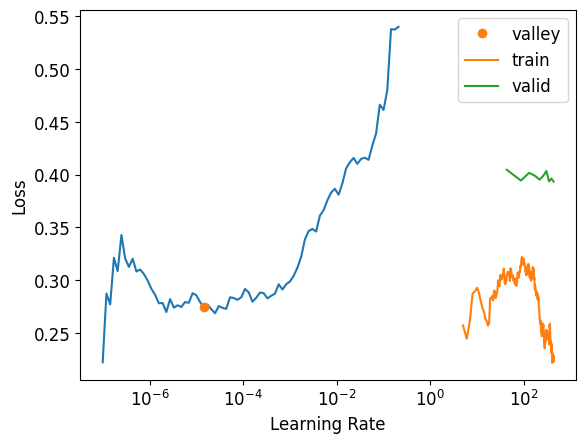

In [ ]:
model.unfreeze()
model.lr_find()
model.fit_one_cycle(10, lr_max = slice (2e-5,6e-5)) #modify to the learning rates range you find
model.save("awesome")
model.recorder.plot_loss()

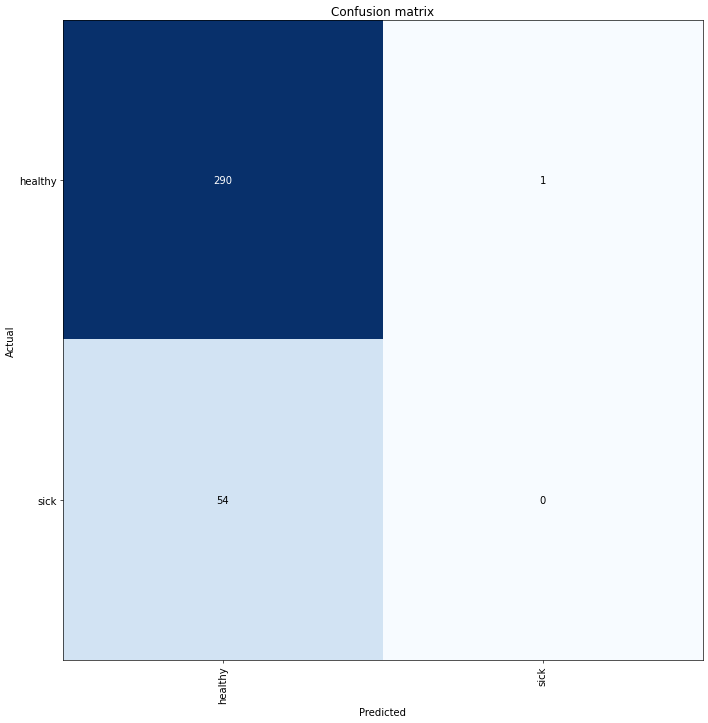

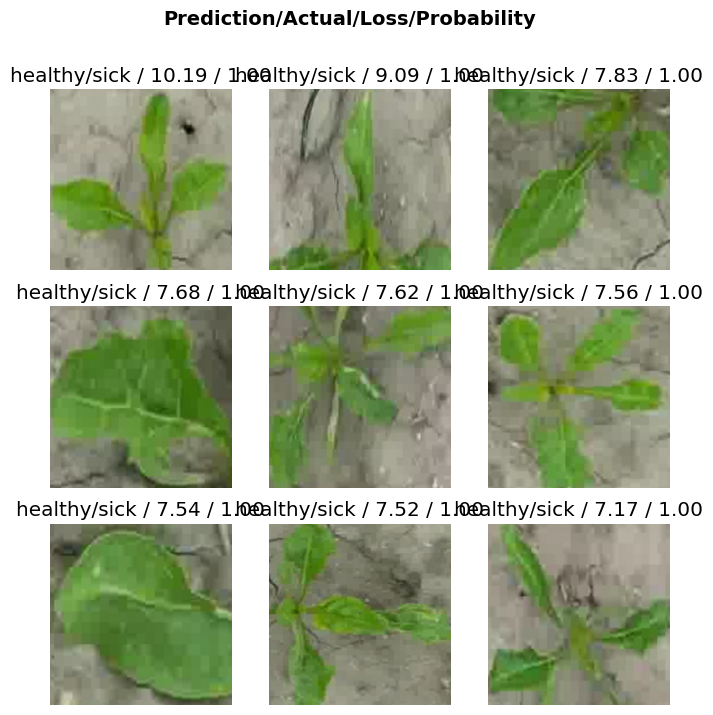

In [57]:
results = ClassificationInterpretation.from_learner(model)
results.plot_confusion_matrix(figsize=(12,12), dpi=60)
results.plot_top_losses(9, figsize = (8, 8))

In [75]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00


In [95]:
#run inference on test dataset
import glob
from IPython.display import Image, display
from roboflow import Roboflow
from fastai.callback import *

for imageName in glob.glob('/content/drive/MyDrive/output/test/*.jpg'):
    print(imageName)
    img = open_image(imageName)
    prediction = learn.predict(img)
    print(prediction)
    print(prediction[0])
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#  export its meta data as a .pkl file, and then load it later for inference
#to export the model
model.export('/content/drive/MyDrive/savedTrainedImages/tst2_model.pkl')

# to load the model for inference
learner_inf = load_learner('/content/drive/MyDrive/savedTrainedImages/tst2_model.pkl')

In [94]:
#Evaluate our training with the test dataset

test_dl = dls.test_dl(get_image_files_sorted("/content/drive/MyDrive/output/test"))

# getting the predictions of our model
preds, _ = learner_inf.get_preds(dl=test_dl)

NameError: name 'learner_inf' is not defined

In [ ]:
import tensorflow as tf

print(tf.shape(preds))

tf.Tensor([1728    2], shape=(2,), dtype=int32)


In [ ]:

# first, we figure out the index that has the max probability in each row
# this is the index of the class our model believes the test image belongs to
y = torch.argmax(preds, dim=1)

# now, we make use of the o2i methods to find the class associated with each index
# since o2i is actually a mapping from class to index value, we modify the code to compute the reverse mapping
cls_preds = list(map(lambda x: list(dls.vocab.o2i.keys())[list(dls.vocab.o2i.values()).index(x)], y))

# print our predictions of each test image
print(len(cls_preds))

1728


In [ ]:

# compare predictions with the actual test labels

# load in the paths of all test images
imgs = get_image_files_sorted('/content/drive/MyDrive/output/test')
# extract the labels of each image
for i in range(len(imgs)):
  # compare model predictions with actual output
  comp = [x == y for x,y in zip(cls_preds, imgs)]

  # if we sum up our comparison list, we total comes out as 28
  # this means that all 28 of our predictions was correct
  sum(comp)

In [ ]:
len(comp)

1728

In [ ]:
https://medium.com/@FastAIButMakeItSlow/image-classification-using-fastai-dogs-vs-cats-project-bbe752a4bcf8
https://course18.fast.ai/lessons/lesson1.html
https://www.youtube.com/watch?v=93kXzUOiYY4